In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn.metrics import silhouette_score

import random as rd
import renders as rs
import itertools

In [450]:
df = pd.read_csv('new_data.csv')
d1 = pd.DataFrame(df)

d2 = pd.DataFrame(d1, columns = ['first_active_month','card_id','target','hist_category_1_sum' , 'hist_weekofyear_nunique', 
                                 'hist_month_diff_mean','hist_weekend_sum','new_hist_month_lag_mean',
                                 'new_hist_purchase_amount_var',
                                 'new_hist_category_2_mean_mean',
                                 'hist_month_nunique','hist_subsector_id_nunique',
                                 'new_hist_purchase_date_diff'], index = range(0,153198))

In [453]:
d1_target = d2.copy()

In [421]:
df_outlier = d1_target[d1_target['target'] < -30]

In [422]:
df_outlier.head() # target < -30 set

,first_active_month,card_id,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
50,2017-09-01,C_ID_8186f3fcc1,-33.219281,4,15,25.779221,26,1.250000,0.009734,-0.549015,6,15,49.0
71,2015-05-01,C_ID_b9379a30ea,-33.219281,0,11,29.000000,5,2.000000,0.327664,-0.554932,7,9,3.0
173,2017-01-01,C_ID_ae77d244b6,-33.219281,20,31,26.910714,16,1.000000,0.068053,-0.550160,11,14,23.0
193,2017-03-01,C_ID_6a2c823e5f,-33.219281,6,13,31.909091,4,1.000000,0.000452,-0.550160,6,7,18.0
287,2017-06-01,C_ID_98e1cb10b6,-33.219281,21,16,29.905405,19,1.571429,0.003064,-0.550654,5,13,40.0


In [423]:
df_outlier.describe()

,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
count,1.198000e+03,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,-3.321928e+01,14.097663,21.519199,28.997132,25.636895,1.334234,0.303115,-0.551017,7.966611,12.553422,21.196995
std,9.240913e-14,27.634528,9.897008,2.445673,26.501447,0.341682,3.347495,0.002099,2.278567,4.692204,16.196772
min,-3.321928e+01,0.000000,5.000000,25.454545,0.000000,1.000000,0.000000,-0.557578,4.000000,1.000000,0.000000
25%,-3.321928e+01,0.000000,14.000000,27.281250,8.250000,1.000000,0.001273,-0.550768,6.000000,9.000000,6.000000
50%,-3.321928e+01,3.000000,20.000000,28.735088,18.000000,1.272727,0.007475,-0.550160,8.000000,12.000000,19.000000
75%,-3.321928e+01,16.000000,27.000000,30.805159,34.000000,1.537775,0.051386,-0.550160,10.000000,16.000000,34.000000
max,-3.321928e+01,298.000000,52.000000,35.789474,213.000000,2.000000,109.247503,-0.549015,12.000000,30.000000,60.000000


In [425]:
df_without = d1_target.drop(df_outlier.index)

In [426]:
df_outlier = df_outlier.reset_index(drop = True)

In [427]:
df_without.describe()

,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
count,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000
mean,-0.267056,5.953526,21.331776,26.939187,27.986184,1.477370,0.405231,-0.550929,7.347493,12.297257,34.206618
std,1.495401,18.072105,12.569030,2.427159,34.100946,0.290758,9.522688,0.002104,3.139729,5.090679,17.292297
min,-17.608147,0.000000,1.000000,25.000000,0.000000,1.000000,0.000000,-0.557578,2.000000,1.000000,0.000000
25%,-0.937295,0.000000,11.000000,25.773050,7.000000,1.285714,0.001545,-0.550778,5.000000,9.000000,22.000000
50%,-0.135432,0.000000,18.000000,25.857143,17.000000,1.500000,0.007926,-0.550160,7.000000,12.000000,37.000000
75%,0.551645,4.000000,29.000000,26.813953,35.000000,1.666667,0.044929,-0.550160,10.000000,16.000000,49.000000
max,10.571836,720.000000,52.000000,38.000000,659.000000,2.000000,2239.915499,-0.549015,12.000000,34.000000,61.000000


In [428]:
df_without.head() # without target outliers

,first_active_month,card_id,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
0,2017-06-01,C_ID_92a2005557,-0.820283,0,35,25.800000,90,1.478261,0.018445,-0.550160,9,21,54.0
1,2017-01-01,C_ID_3d0044924f,0.392913,31,50,26.820000,132,1.500000,0.000205,-0.550160,12,24,56.0
2,2017-09-01,C_ID_186d6a6901,0.142495,12,20,25.714286,11,1.714286,0.004340,-0.556518,6,13,41.0
3,2017-11-01,C_ID_cdbd2c0db2,-0.159749,15,17,25.721805,42,1.555556,0.050096,-0.555446,4,17,57.0
4,2016-09-01,C_ID_0894217f2f,0.871585,1,16,32.969697,10,1.750000,0.078597,-0.550160,7,8,31.0


In [429]:
df_without = df_without.reset_index(drop = True)

In [430]:
df_without.isna().sum()

first_active_month               0
card_id                          0
target                           0
hist_category_1_sum              0
hist_weekofyear_nunique          0
hist_month_diff_mean             0
hist_weekend_sum                 0
new_hist_month_lag_mean          0
new_hist_purchase_amount_var     0
new_hist_category_2_mean_mean    0
hist_month_nunique               0
hist_subsector_id_nunique        0
new_hist_purchase_date_diff      0
dtype: int64

In [473]:
d_new = d2.copy()

In [490]:
data = d2.drop(columns = ['card_id','first_active_month'],axis = 1)
# 'Unnamed: 0','Unnamed: 0.1'

In [491]:
data.head()

,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
0,-0.820283,0,35,25.800000,90,1.478261,0.018445,-0.550160,9,21,54.0
1,0.392913,31,50,26.820000,132,1.500000,0.000205,-0.550160,12,24,56.0
2,0.142495,12,20,25.714286,11,1.714286,0.004340,-0.556518,6,13,41.0
3,-0.159749,15,17,25.721805,42,1.555556,0.050096,-0.555446,4,17,57.0
4,0.871585,1,16,32.969697,10,1.750000,0.078597,-0.550160,7,8,31.0


In [492]:
data.tail()

,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
153193,0.145590,11,13,25.750000,10,1.000000,0.000285,-0.555640,8,5,9.0
153194,-0.822266,0,9,25.925926,9,1.333333,0.948327,-0.550160,5,9,57.0
153195,-1.753271,5,8,27.600000,13,1.750000,0.001658,-0.550160,3,14,52.0
153196,0.093494,8,15,25.793103,9,1.000000,0.153754,-0.550621,7,18,5.0
153197,-4.676589,0,19,29.846154,5,1.600000,2.285806,-0.550160,10,9,49.0


In [493]:
indices = []


In [494]:
rd.seed(2)
for i in range(5):
    indices.append(rd.randrange(0, 153197))                 # Even integer from 0 to 100 inclusive

In [495]:
indices

[14824, 24008, 22248, 94649, 44324]

In [496]:
# Create a DataFrame of the chosen samples
# .reset_index(drop = True) resets the index from 0, 1 and 2 instead of 100, 200 and 300 
samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
0,0.487152,0,30,25.768831,120,1.400000,0.001763,-0.55016,7,23,41.0
1,-2.033307,22,23,26.952381,7,1.000000,0.114288,-0.55016,11,12,18.0
2,-6.011496,1,9,27.800000,7,1.666667,0.015488,-0.55564,7,6,24.0
3,0.565709,1,19,28.888889,9,2.000000,0.033098,-0.55016,8,8,19.0
4,-0.109619,0,41,25.778378,154,1.461538,0.386879,-0.55016,12,21,58.0


In [497]:
# Scale the data to unit variance
stan = StandardScaler()
log_data = stan.fit_transform(data)

In [498]:
# Scale the samples 
log_samples = stan.fit_transform(samples)

In [43]:
# # TODO: Scale the data using the natural logarithm
# log_data = np.log(data+1)

# log_samples = np.log(samples+1)


D:\anaconda\conda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\anaconda\conda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
D:\anaconda\conda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [105]:
# # Select the indices for data points you wish to remove
# outliers_lst  = []

# # For each feature find the data points with extreme high or low values
# for feature in log_data.columns:
#     # TODO: Calculate Q1 (25th percentile of the data) for the given feature
#     Q1 = np.percentile(log_data.loc[:, feature], 25)
    
#     # TODO: Calculate Q3 (75th percentile of the data) for the given feature
#     Q3 = np.percentile(log_data.loc[:, feature], 75)
    
#     # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
#     step = 1.5 * (Q3 - Q1)
    
#     # Display the outliers
#     print("Data points considered outliers for the feature '{}':".format(feature))
    
#     # The tilde sign ~ means not
#     # So here, we're finding any points outside of Q1 - step and Q3 + step
#     outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
#     # display(outliers_rows)

#     outliers_lst.append(list(outliers_rows.index))
        
# outliers = list(itertools.chain.from_iterable(outliers_lst))

# # List of unique outliers
# # We use set()
# # Sets are lists with no duplicate entries
# uniq_outliers = list(set(outliers))
        
# # List of duplicate outliers
# dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
        
# print('Outliers list:\n', uniq_outliers)
# print('Length of outliers list:\n', len(uniq_outliers))

# print('Duplicate list:\n', dup_outliers)
# print('Length of duplicates list:\n', len(dup_outliers))

# # Remove duplicate outliers
# # Only 5 specified
# good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# # Original Data 
# print('Original shape of data:\n', data.shape)
# # Processed Data
# print('New shape of data:\n', good_data.shape)

Data points considered outliers for the feature '0':
Data points considered outliers for the feature '1':
Data points considered outliers for the feature '2':
Data points considered outliers for the feature '3':
Data points considered outliers for the feature '4':
Data points considered outliers for the feature '5':
Data points considered outliers for the feature '6':
Data points considered outliers for the feature '7':
Data points considered outliers for the feature '8':
Data points considered outliers for the feature '9':
Data points considered outliers for the feature '10':


KeyboardInterrupt: 

In [221]:
# good_data

In [499]:
X = pd.DataFrame(log_data).copy()

## Principle component analysis

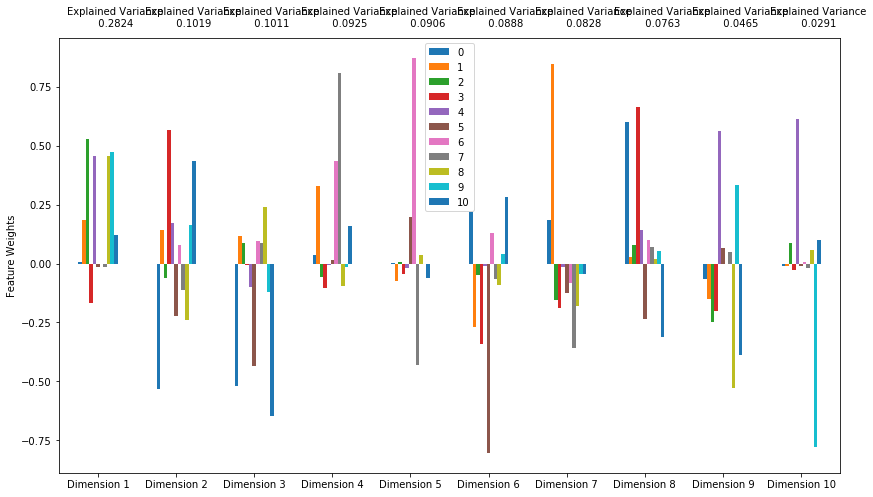

In [500]:
pca = PCA(n_components=10)
# Fit
pca.fit(X)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(X, pca)

In [501]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,0,1,2,3,4,5,6,7,8,9,10
Dimension 1,0.2824,0.0045,0.1841,0.5287,-0.1682,0.4584,-0.0142,-0.0008,-0.0161,0.4569,0.4735,0.1216
Dimension 2,0.1019,-0.5317,0.1405,-0.0614,0.5668,0.1718,-0.2227,0.0773,-0.1141,-0.2391,0.1619,0.4372
Dimension 3,0.1011,-0.5179,0.1185,0.0871,-0.0062,-0.0976,-0.4365,0.0948,0.0892,0.2406,-0.1218,-0.6484
Dimension 4,0.0925,0.0350,0.3301,-0.0553,-0.1023,-0.0081,0.0139,0.4338,0.8080,-0.0946,-0.0167,0.1603
Dimension 5,0.0906,0.0002,-0.0744,0.0054,-0.0432,-0.0189,0.1956,0.8736,-0.4312,0.0351,0.0001,-0.0600
Dimension 6,0.0888,0.2206,-0.2710,-0.0498,-0.3428,-0.0121,-0.8042,0.1297,-0.0675,-0.0930,0.0400,0.2817
Dimension 7,0.0828,0.1844,0.8488,-0.1541,-0.1889,-0.0148,-0.1250,-0.0805,-0.3572,-0.1797,-0.0440,-0.0441
Dimension 8,0.0763,0.6006,0.0285,0.0776,0.6645,0.1418,-0.2336,0.1014,0.0682,0.0194,0.0526,-0.3131
Dimension 9,0.0465,-0.0640,-0.1516,-0.2489,-0.2035,0.5642,0.0639,-0.0040,0.0507,-0.5303,0.3343,-0.3893
Dimension 10,0.0291,-0.0117,-0.0090,0.0873,-0.0256,0.6117,-0.0109,0.0078,-0.0203,0.0570,-0.7768,0.1003


pandas.core.frame.DataFrame

Dimension 1     0.2824
Dimension 2     0.3843
Dimension 3     0.4854
Dimension 4     0.5779
Dimension 5     0.6685
Dimension 6     0.7573
Dimension 7     0.8401
Dimension 8     0.9164
Dimension 9     0.9629
Dimension 10    0.9920
Name: Explained Variance, dtype: float64

In [502]:
pca = PCA(n_components=2)
pca.fit(X)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(X)
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
# ,'3','4','5','6','7'

In [531]:
# Create range of clusters 
range_n_clusters = list(range(3,7))
print(range_n_clusters)

[3, 4, 5, 6]


In [532]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 3. The average silhouette_score is : 0.3575765101483685
For n_clusters = 4. The average silhouette_score is : 0.3861450509511866
For n_clusters = 5. The average silhouette_score is : 0.33938691788864134
For n_clusters = 6. The average silhouette_score is : 0.3512653104151818


In [524]:
# Initialize and predict
clusterer = KMeans(n_clusters=4,random_state = 0).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

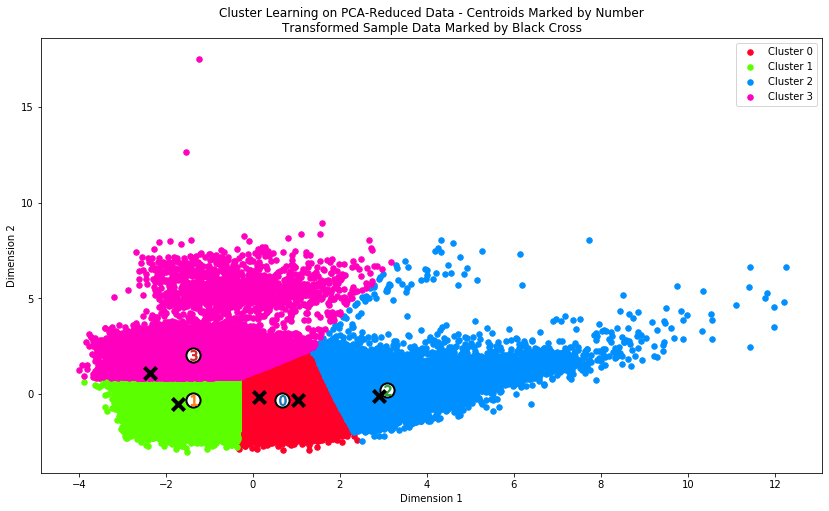

In [525]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

In [200]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)-1
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(true_centers, columns = data.columns)
true_centers.index = segments
display(true_centers)

,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
Segment 0,-0.653585,0.021234,-0.579790,3.117222,-0.233258,-0.332357,0.160843,-0.202066,-0.684562,-0.263578,1.243699
Segment 1,0.143337,-0.057467,-0.050271,-0.121087,-0.101233,0.057448,-0.018573,0.034394,0.007084,-0.100819,-0.131061
Segment 2,0.175892,-0.294438,-0.573620,0.091753,-0.558234,0.095439,-0.021954,0.069145,-0.489143,-0.567924,-0.300974
Segment 3,-0.217650,1.122783,5.895915,-0.281398,5.016576,-0.145456,0.033799,-0.115116,3.797934,5.337763,1.003204
Segment 4,0.168589,0.286676,1.350628,-0.351119,0.958648,0.038376,-0.022112,0.009323,1.216050,1.011970,0.055937


In [526]:
# Get the prediction result
preds

array([2, 2, 0, ..., 3, 0, 3])

In [528]:
# create new column
d_new['Cluster'] = preds

# Merge results back to original dataset
df_final = pd.DataFrame(d_new.groupby(d_new['Cluster']).mean())
df_final

,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
Cluster,,,,,,,,,,,
0,-0.203126,6.153156,26.295119,26.261378,28.357562,1.476625,0.288835,-0.550899,9.081614,13.997811,34.012546
1,-0.122632,2.424707,11.440237,26.476387,9.422438,1.494012,0.248389,-0.550819,5.129923,8.630703,29.909893
2,-0.372227,17.142317,42.029836,26.171271,84.568227,1.461418,0.439718,-0.551087,11.141101,19.474420,42.042213
3,-3.451899,3.432579,13.435158,32.388884,16.914748,1.425842,1.368879,-0.551242,4.774038,10.591410,39.441156


In [338]:
df_without.describe()

,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff,Cluster
count,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000,152000.000000
mean,-0.523987,6.010276,21.332612,26.955638,27.970684,1.476303,0.402588,-0.550930,7.352079,12.298743,34.103263,1.144217
std,3.258731,18.166109,12.550749,2.434283,34.064239,0.291459,9.477582,0.002104,3.134483,5.088507,17.322127,1.068548
min,-33.219281,0.000000,1.000000,25.000000,0.000000,1.000000,0.000000,-0.557578,2.000000,1.000000,0.000000,0.000000
25%,-0.963238,0.000000,11.000000,25.773810,7.000000,1.279070,0.001543,-0.550778,5.000000,9.000000,22.000000,0.000000
50%,-0.146418,0.000000,18.000000,25.857988,17.000000,1.500000,0.007926,-0.550160,7.000000,12.000000,37.000000,1.000000
75%,0.545314,4.000000,29.000000,26.829098,35.000000,1.666667,0.045002,-0.550160,10.000000,16.000000,49.000000,2.000000
max,10.571836,720.000000,52.000000,38.000000,659.000000,2.000000,2239.915499,-0.549015,12.000000,34.000000,61.000000,3.000000


In [529]:
d_new

,first_active_month,card_id,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff,Cluster
0,2017-06-01,C_ID_92a2005557,-0.820283,0,35,25.800000,90,1.478261,0.018445,-0.550160,9,21,54.0,2
1,2017-01-01,C_ID_3d0044924f,0.392913,31,50,26.820000,132,1.500000,0.000205,-0.550160,12,24,56.0,2
2,2017-09-01,C_ID_186d6a6901,0.142495,12,20,25.714286,11,1.714286,0.004340,-0.556518,6,13,41.0,0
3,2017-11-01,C_ID_cdbd2c0db2,-0.159749,15,17,25.721805,42,1.555556,0.050096,-0.555446,4,17,57.0,0
4,2016-09-01,C_ID_0894217f2f,0.871585,1,16,32.969697,10,1.750000,0.078597,-0.550160,7,8,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153193,2017-06-01,C_ID_598ecf1dfe,0.145590,11,13,25.750000,10,1.000000,0.000285,-0.555640,8,5,9.0,1
153194,2014-10-01,C_ID_64545039d3,-0.822266,0,9,25.925926,9,1.333333,0.948327,-0.550160,5,9,57.0,1
153195,2017-10-01,C_ID_9072609210,-1.753271,5,8,27.600000,13,1.750000,0.001658,-0.550160,3,14,52.0,3
153196,2017-08-01,C_ID_7666735b3d,0.093494,8,15,25.793103,9,1.000000,0.153754,-0.550621,7,18,5.0,0


In [530]:
d_new.groupby(d_new['Cluster']).count()


,first_active_month,card_id,target,hist_category_1_sum,hist_weekofyear_nunique,hist_month_diff_mean,hist_weekend_sum,new_hist_month_lag_mean,new_hist_purchase_amount_var,new_hist_category_2_mean_mean,hist_month_nunique,hist_subsector_id_nunique,new_hist_purchase_date_diff
Cluster,,,,,,,,,,,,,
0,52528,52528,52528,52528,52528,52528,52528,52528,52528,52528,52528,52528,52528
1,62137,62137,62137,62137,62137,62137,62137,62137,62137,62137,62137,62137,62137
2,23026,23026,23026,23026,23026,23026,23026,23026,23026,23026,23026,23026,23026
3,15507,15507,15507,15507,15507,15507,15507,15507,15507,15507,15507,15507,15507


In [516]:
# Save as csv files
d_new.to_csv('cluster_results.csv')
df_final.to_csv('cluster_mean.csv')

******

Reference: 
- https://github.com/ritchieng/machine-learning-nanodegree/tree/master/unsupervised_learning/customer_segments

- https://www.kaggle.com/c/elo-merchant-category-recommendation/overview
